In [1]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from aoe2mapgenerator.common.enums.enum import (
    MapLayerType, 
    ObjectSize, 
    GateTypes, 
    TemplateTypes, 
    ObjectRotation, 
    YamlReplacementKeywords,
    CheckPlacementReturnTypes
)

from aoe2mapgenerator.scenario.scenario import Scenario
import numpy as np
import random
from aoe2mapgenerator.common.constants.constants import DEFAULT_EMPTY_VALUE, BASE_SCENE_DIR_LINUX, BASE_SCENARIO_NAME, TEMPLATE_DIR_LINUX
from aoe2mapgenerator.common.enums.enum import GateTypes
import multiprocessing as mp
from aoe2mapgenerator.map.map import Map
import os
from aoe2mapgenerator.serializer.serializer import (
    _convert_map_value_to_string,_get_enum_list, 
    _recursive_parse_enum_to_string, serialize_map, 
    get_all_functions_and_arguments, 
    _get_functions,
    _get_function_arguments,
    _get_default_arguments,
    _convert_enum_instance_to_string)
from aoe2mapgenerator.triggers.triggers import TriggerObject
from aoe2mapgenerator.maingenerator import main_map_generator
import inspect
import ast
import json
from enum import Enum
from AoE2ScenarioParser.scenarios.aoe2_de_scenario import AoE2DEScenario
# from aoe2mapgenerator.units.placers.templateplacer import _convert_parameter_to_python_type
from aoe2mapgenerator.units.placers.statictemplate import TemplateCreator
from aoe2mapgenerator.units.placers.group_placer import GroupPlacerManager
from aoe2mapgenerator.units.placers.point_manager import PointManager
from aoe2mapgenerator.testing import awesome_function

In [2]:
# import cProfile
# data = cProfile.run('group_placer_manager.place_groups(points_manager, MapLayerType.UNIT, UnitInfo.AMAZON_ARCHER, PlayerId.ONE, 200, 200, None, None, 1)')

In [3]:
n = 500
map = Map(n)

In [4]:
group_placer_manager = GroupPlacerManager(map)

In [5]:
points_manager = PointManager()

for i in range(n):
    for j in range(n):
        points_manager.add_point((i,j))

In [6]:
group_placer_manager.place_groups(points_manager, MapLayerType.UNIT, UnitInfo.AMAZON_ARCHER, PlayerId.ONE, 500, 250, None, None, 0)

In [29]:
map.get_map_layer(MapLayerType.UNIT).array[0][0]

(<UnitInfo.AMAZON_ARCHER: (850, 165, 1325, 16683, False)>, <PlayerId.ONE: 1>)

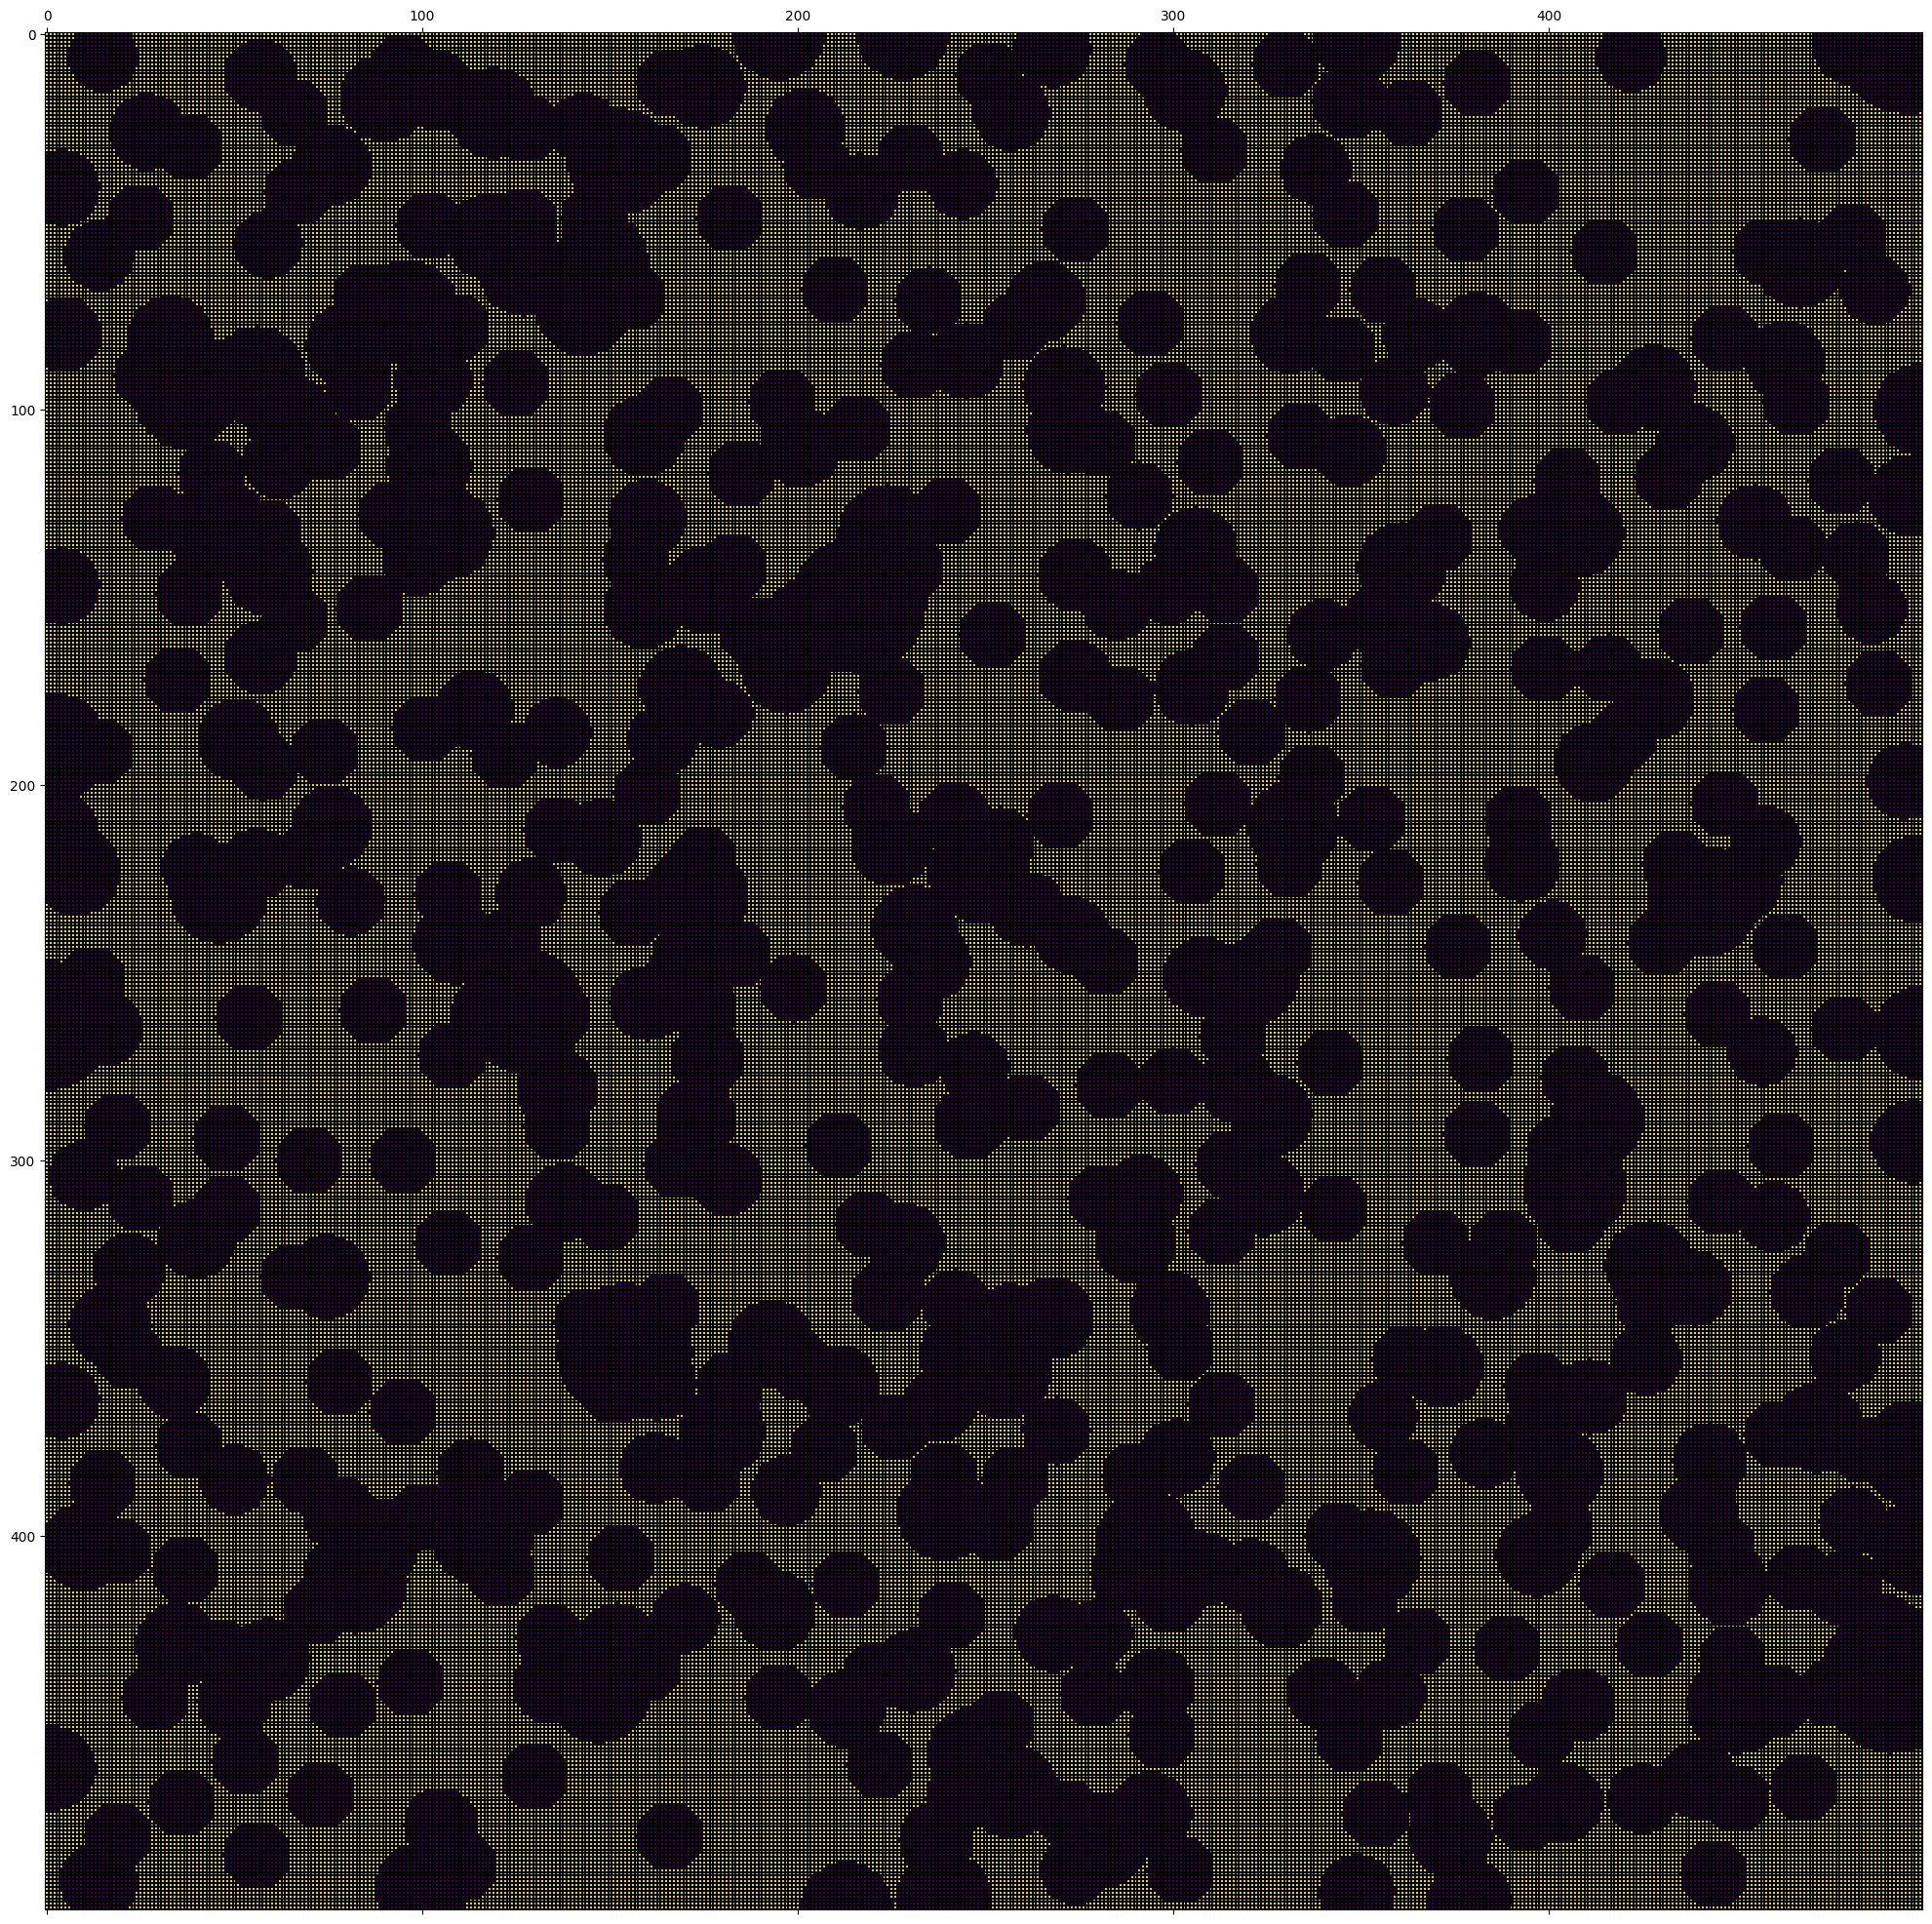

In [7]:
map.visualize_mat(MapLayerType.UNIT, include_zones=False)